In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission08f968d.xlsx', 'test_file.csv', 'train_file.csv']


In [2]:
# Import data load 

train=pd.read_csv('../input/train_file.csv')
test=pd.read_csv('../input/test_file.csv')
sample=pd.read_excel('../input/sample_submission08f968d.xlsx')

In [3]:
#Check train data
train.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [4]:
#Check train columns and test columns
train.columns,test.columns

(Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
        'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
        'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
        'StratID3', 'StratificationType', 'Greater_Risk_Probability'],
       dtype='object'),
 Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
        'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
        'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
        'StratID3', 'StratificationType'],
       dtype='object'))

In [5]:
# drop columns
train.drop(['Patient_ID','LocationDesc','Greater_Risk_Question','Description','GeoLocation'],axis=1,inplace=True)
test.drop(['Patient_ID','LocationDesc','Greater_Risk_Question','Description','GeoLocation'],axis=1,inplace=True)

In [6]:
# check nan value in train and test
train.isnull().any().sum(),test.isnull().any().sum()

(0, 0)

In [7]:
# Import seaborn and maplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


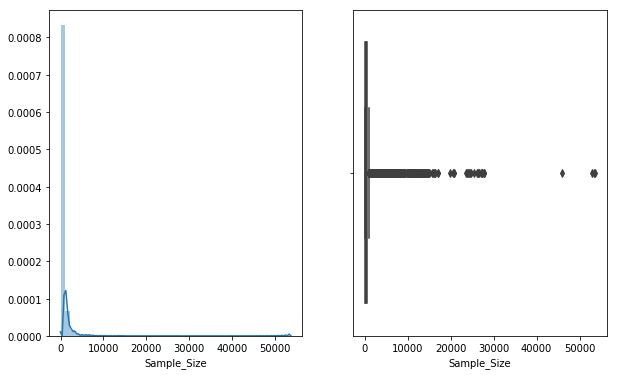

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(train['Sample_Size'])


plt.subplot(1,2,2)
sns.boxplot(train['Sample_Size'])

In [9]:
#train=train.loc[(train['Sample_Size']<19000)]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


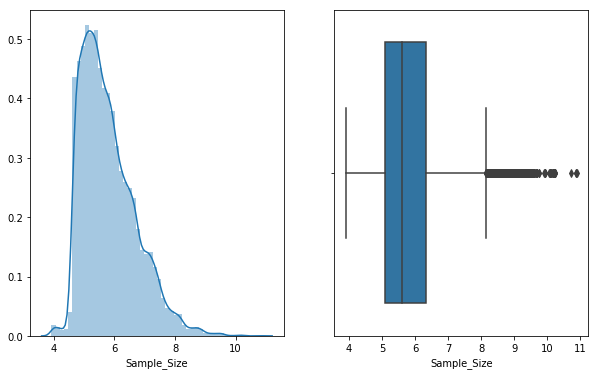

In [10]:
train['Sample_Size']=np.log(train['Sample_Size'])
test['Sample_Size']=np.log(test['Sample_Size'])

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot((train['Sample_Size']))


plt.subplot(1,2,2)
sns.boxplot((train['Sample_Size']))

In [11]:
# probability greater than 1
train=train[train['Greater_Risk_Probability']>1]


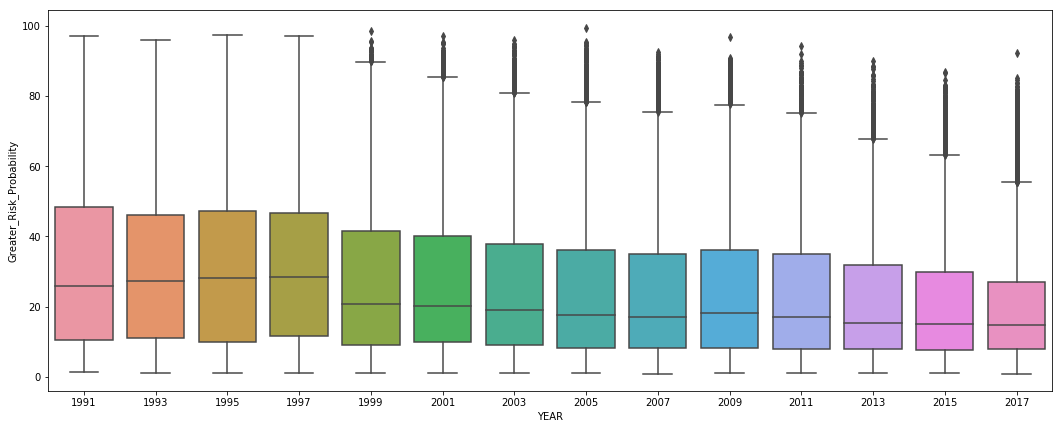

In [12]:
# Check with year how is Greater_Risk_Probability 
plt.figure(figsize=(18,7))
sns.boxplot(data=train,x='YEAR',y='Greater_Risk_Probability')
# It is decreasing

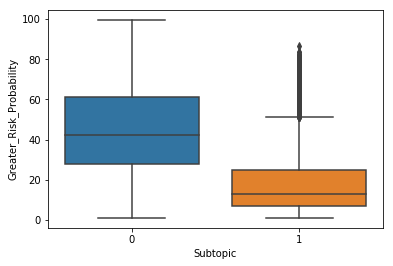

In [13]:
# Check how Subtopic is related to Greater_Risk_Probability
sns.boxplot(data=train,x='Subtopic',y='Greater_Risk_Probability')


* Subtopic 1 decrease the risk
* Could be important feature

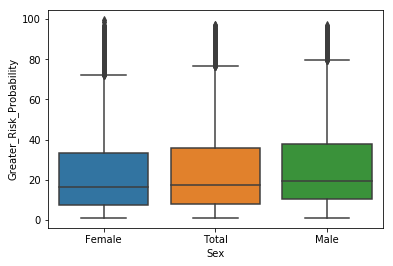

In [14]:
# Check gender 
sns.boxplot(data=train,x='Sex',y='Greater_Risk_Probability')

* Risk is same across gender 

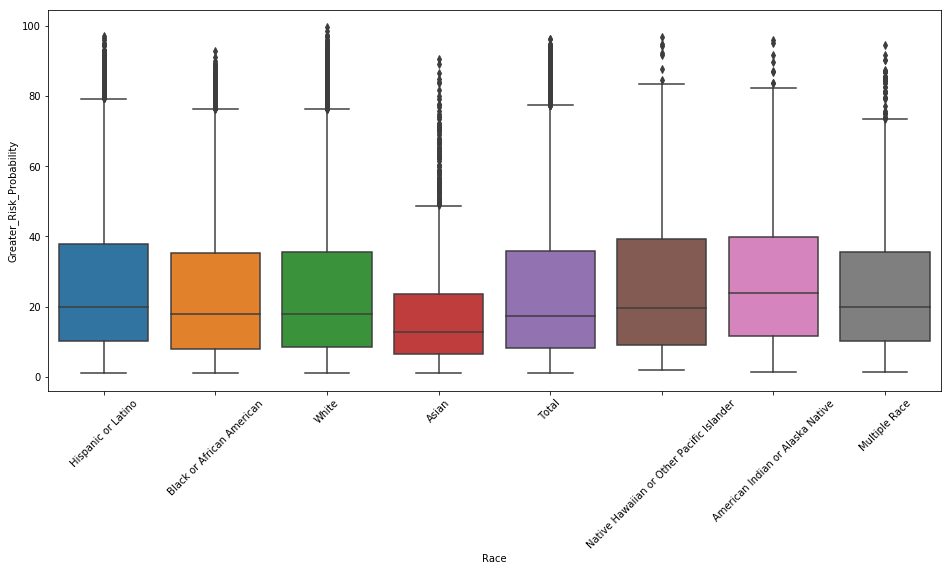

In [15]:
# Check with Race
plt.figure(figsize=(16,7))
plt.xticks( rotation='45')
sns.boxplot(data=train,x='Race',y='Greater_Risk_Probability')


* Asian have less Risk

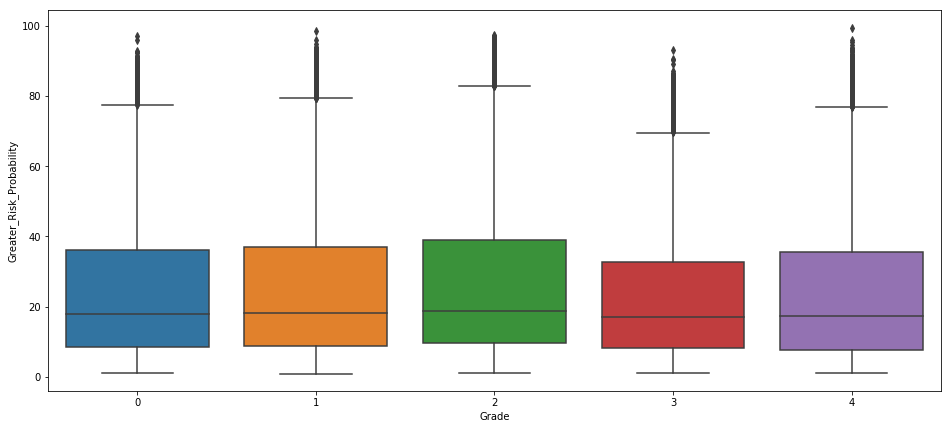

In [16]:
# Check with Grade
plt.figure(figsize=(16,7))
sns.boxplot(data=train,x='Grade',y='Greater_Risk_Probability')


* Grade 3 have low Risk

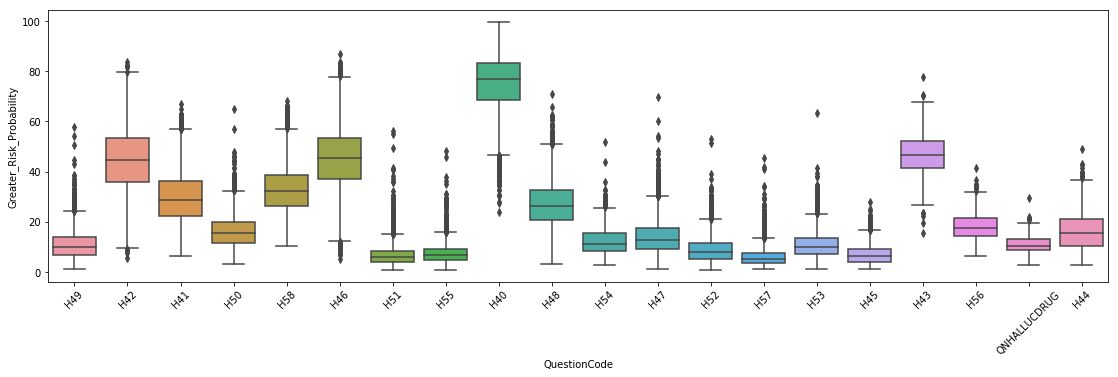

In [17]:
# With QuestionCode
plt.figure(figsize=(19,5))
plt.xticks(rotation='45')
sns.boxplot(data=train,x='QuestionCode',y='Greater_Risk_Probability')

* H40 has very high risk.
* H42,H46 and H43 have high risk.
* H41,H56 and H48 risk.

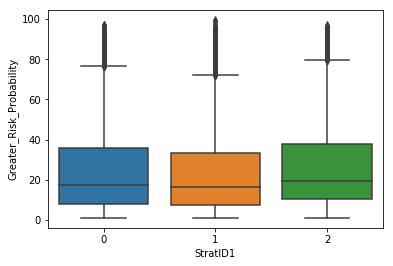

In [18]:
# With StratID1
sns.boxplot(data=train,x='StratID1',y='Greater_Risk_Probability')

* Almost same risk.

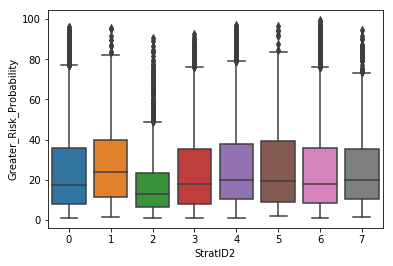

In [19]:
# Check with StratID2
sns.boxplot(data=train,x='StratID2',y='Greater_Risk_Probability')


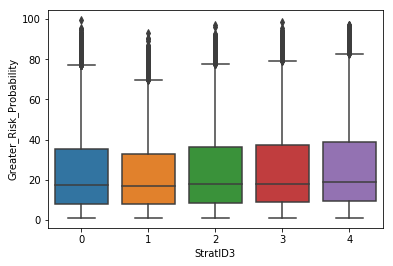

In [20]:
sns.boxplot(data=train,x='StratID3',y='Greater_Risk_Probability')

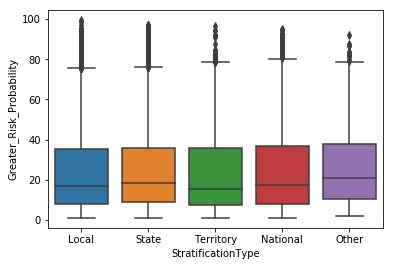

In [21]:
sns.boxplot(data=train,x='StratificationType',y='Greater_Risk_Probability')

In [22]:
train['Sample_Size']=np.round(train['Sample_Size'])
test['Sample_Size']=np.round(test['Sample_Size'])

In [23]:
train.head()

,YEAR,Subtopic,Sample_Size,Sex,Race,Grade,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1995,1,6.0,Female,Hispanic or Latino,4,H49,1,4,0,Local,7.4793
1,1997,0,6.0,Total,Black or African American,4,H42,0,3,0,Local,49.6852
2,1993,0,5.0,Female,White,0,H41,1,6,2,State,47.8132
3,2017,1,5.0,Male,Asian,4,H49,2,2,0,State,3.4554
5,2015,1,5.0,Male,Black or African American,3,H50,2,3,1,Local,23.4575


In [24]:
test.head()

,YEAR,Subtopic,Sample_Size,Sex,Race,Grade,QuestionCode,StratID1,StratID2,StratID3,StratificationType
0,2007,1,5.0,Male,Hispanic or Latino,3,H46,2,4,1,Other
1,2001,1,7.0,Total,Total,2,H48,0,0,4,State
2,2005,1,5.0,Male,Hispanic or Latino,4,H58,2,4,0,Local
3,2017,1,5.0,Male,Total,2,H54,2,0,4,State
4,2007,1,5.0,Total,Black or African American,1,H51,0,3,3,State


In [25]:
#train.columns
from sklearn.preprocessing import LabelEncoder
Feature =['YEAR','Sex', 'Race', 'QuestionCode','StratificationType']
for i in Feature:
    LR=LabelEncoder()
    train[i] = LR.fit_transform(train[i])

In [26]:
for i in Feature:
    LR=LabelEncoder()
    test[i] = LR.fit_transform(test[i])

In [27]:
test.head()

,YEAR,Subtopic,Sample_Size,Sex,Race,Grade,QuestionCode,StratID1,StratID2,StratID3,StratificationType
0,8,1,5.0,1,3,3,6,2,4,1,2
1,5,1,7.0,2,6,2,8,0,0,4,3
2,7,1,5.0,1,3,4,18,2,4,0,0
3,13,1,5.0,1,6,2,14,2,0,4,3
4,8,1,5.0,2,2,1,11,0,3,3,3
